In [14]:
import numpy as np
import pandas as pd
from numpy import loadtxt
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import csv
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Serif"]})
font_size = 24
marker_size = 6

args = {'opt': "Prox", #"Avg" "Prox"
        'iid': "niid", #"dirichlet" "niid"
        'dataset': 'mnist', #cifar, mnist, synthetic
        'method': "BL", #"BL" "UR", "opti", "WR", "Sal_WR"
        'ep':20,
        'seed_ind': 0,
        'K':10
        }

In [15]:
def give_filename(args):
    saveFileName = f"csv_res/AoU_{args['dataset']}_{args['iid']}.csv"
    saveFileName = f"csv_res/AoU_{args['dataset']}_{args['iid']}3.csv"
    return saveFileName

def give_data(args):
    file_name = give_filename(args)
    iid_flag = 'd' if args['iid']=="diri" else 'n'
    lala = pd.read_csv(file_name)
    print(lala.columns)
    case_names = ['EVRYX', 'nochannel', 'pure', 'nolater']
    key_names = [f"{iid_flag}AoU_{lala} - accuracy" for lala in case_names]
    key_names.append(f"{iid_flag}Op_M_3 - accuracy")
    # key_names.append(f"{iid_flag}Op_lUE_10_cellR_1000 - accuracy")
    print(key_names)
    return lala[key_names]

lala =give_data(args)
lala[lala.columns[0]]

Index(['Step', 'nAoU_nochannel - accuracy', 'nAoU_nochannel - accuracy__MIN',
       'nAoU_nochannel - accuracy__MAX', 'nAoU_EVRYX - accuracy',
       'nAoU_EVRYX - accuracy__MIN', 'nAoU_EVRYX - accuracy__MAX',
       'nAoU_nolater - accuracy', 'nAoU_nolater - accuracy__MIN',
       'nAoU_nolater - accuracy__MAX', 'nAoU_pure - accuracy',
       'nAoU_pure - accuracy__MIN', 'nAoU_pure - accuracy__MAX',
       'nOp_M_3 - accuracy', 'nOp_M_3 - accuracy__MIN',
       'nOp_M_3 - accuracy__MAX'],
      dtype='object')
['nAoU_EVRYX - accuracy', 'nAoU_nochannel - accuracy', 'nAoU_pure - accuracy', 'nAoU_nolater - accuracy', 'nOp_M_3 - accuracy']


0       6.37
1      19.77
2      19.39
3      26.13
4      30.77
       ...  
595    89.94
596    91.86
597    92.54
598    91.61
599    92.47
Name: nAoU_EVRYX - accuracy, Length: 600, dtype: float64

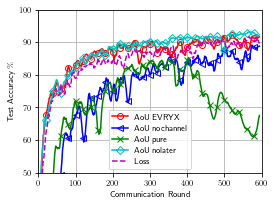

In [16]:
colors = ['r', 'b', 'g', 'c','m','y']
markers = ['o', '<','x','2','+','D']
markers = ['o', '<','x','D','None']
line_style = ['-', '-', '-', '-', '--']
fig = plt.figure(figsize=[4,3])
ax = fig.add_subplot(111)
font_size = 8
marker_size = 6
# window_size = 4
window_size = 11
len_data = len(lala[lala.columns[0]].dropna())
for nb_line, yoyo in enumerate(lala.columns):
    vec = lala[yoyo]
    vec = vec[:len_data]
    acc_smooth = vec.rolling(window_size, center = True).mean()#.dropna()
    acc_std = vec.rolling(window_size, center = True).std()#.dropna()
    plt.plot(acc_smooth, linestyle=line_style[nb_line],  marker= markers[nb_line],markevery = 20, markeredgewidth = 1, fillstyle='none', color = colors[nb_line])
    indvec = np.linspace(0, len_data, int(len_data/50)+1)
    indvec = indvec[:-1]
    # ax.errorbar(indvec,acc_smooth[indvec], yerr = acc_std[indvec],
                # fmt='o', capsize=1,linewidth = 2, color = colors[nb_line])
# marker= markers[nb_line],markevery = 15, markeredgewidth = 1, fillstyle='none'
case_names = ['AoU EVRYX', 'AoU nochannel', 'AoU pure', 'AoU nolater', 'Loss']
plt.legend(case_names,loc=0,prop={'size': font_size})
plt.grid()
plt.xlabel("Communication Round",fontsize=font_size)
plt.ylabel("Test Accuracy $\%$",fontsize=font_size)
plt.xticks(fontsize= font_size)
plt.yticks(fontsize= font_size)
plt.xlim([0,len_data])
# plt.ylim([0,50])
plt.ylim([50,100])

# figure_folder = "D:/Documents/Sciebo_groupfiles/PhD_Paul/figures/"
# figure_folder = "D:/sciebo/files/PhD_Paul/figures/"
figure_folder = "./figures2/"
plt.savefig(figure_folder+"AoU_"+args['dataset']+"_"+args['iid']+"3.pdf")
